In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import sklearn

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.shape

(30, 17)

This is a small Dataset

**Exploratory Data Analysis**

In [5]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


By seeing the above information we can see there is no much skewness in the data in every feature

***Check for duplicates***

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape 

(30, 17)

There is no change in shape so there are no duplicates

***Check for null values***

In [8]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null values

***check for skewness***

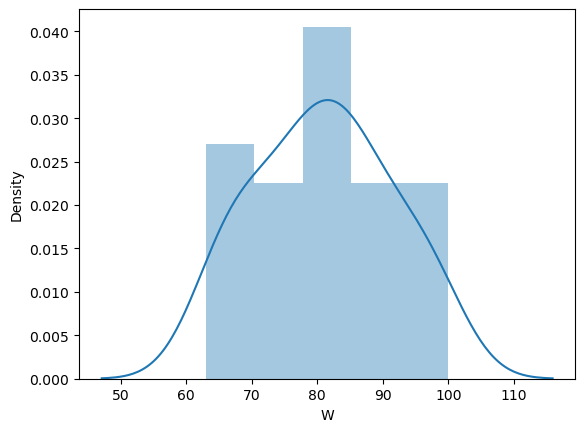

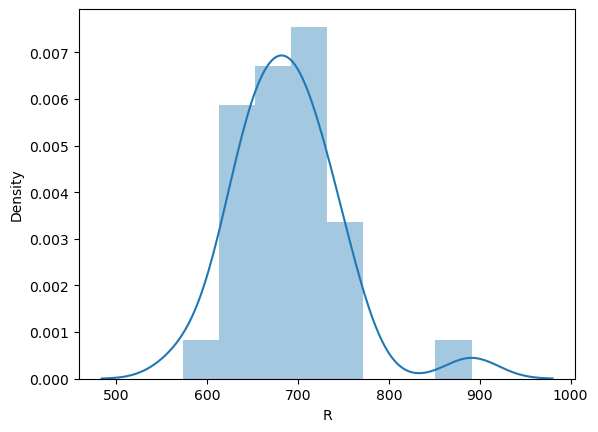

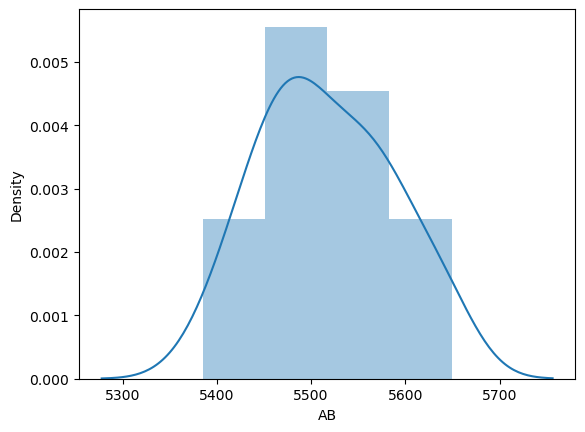

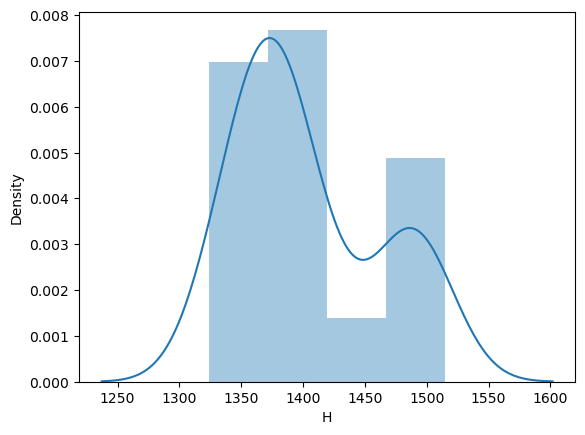

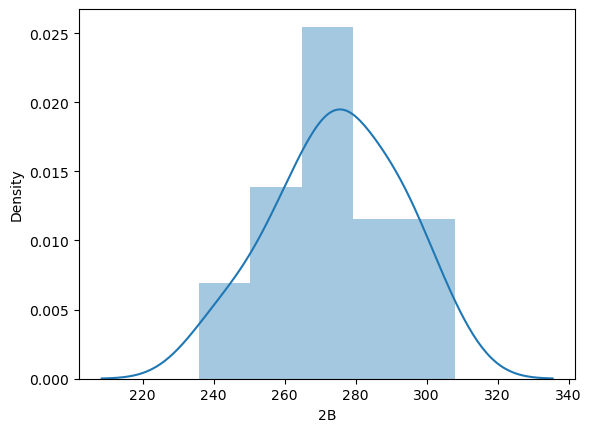

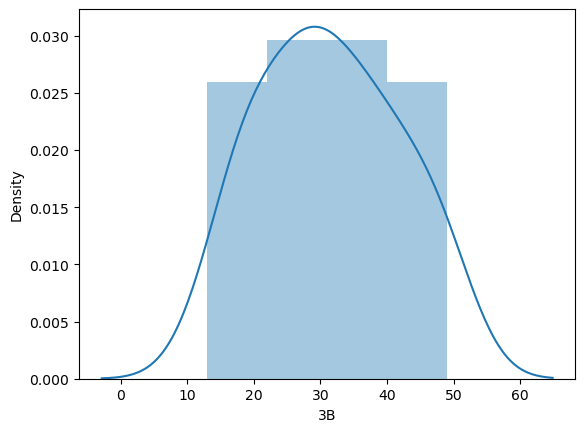

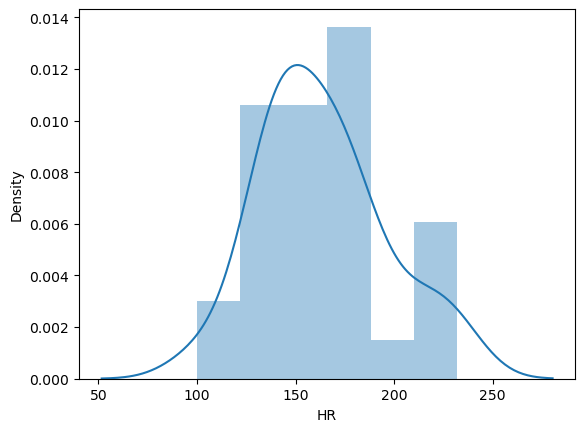

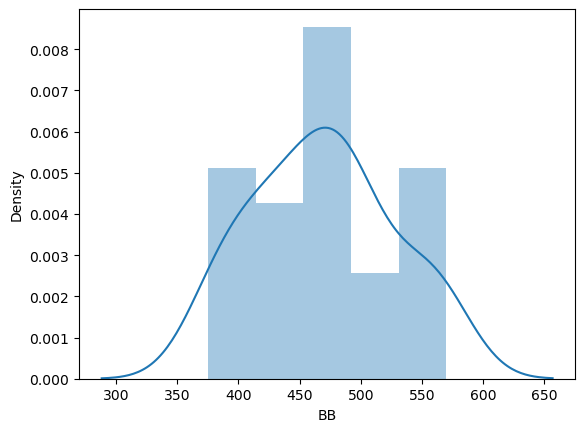

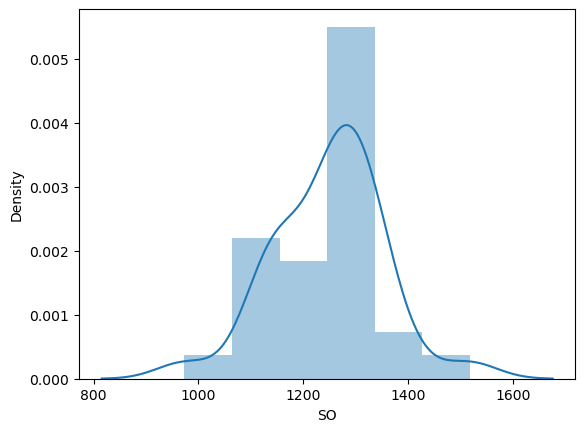

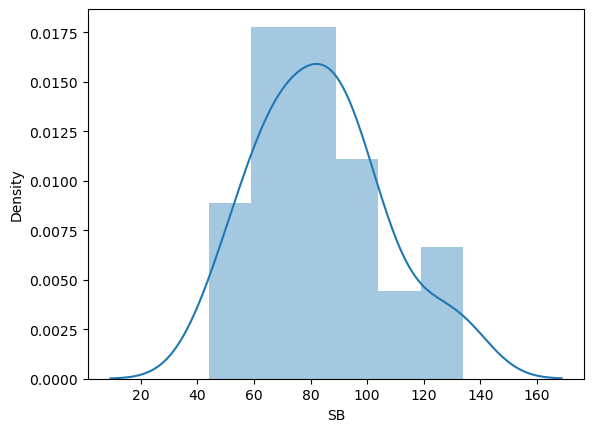

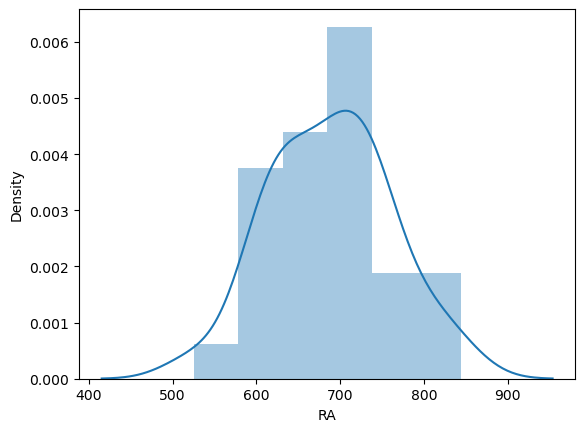

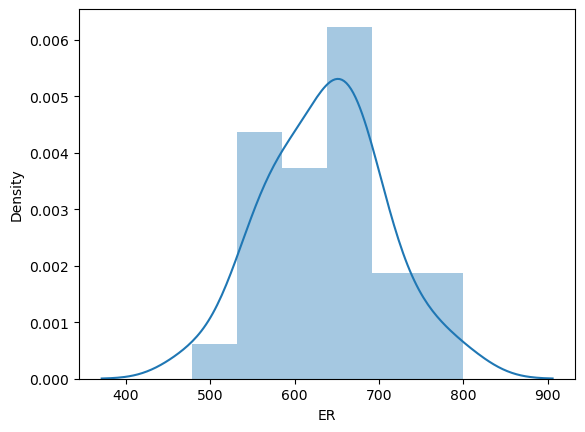

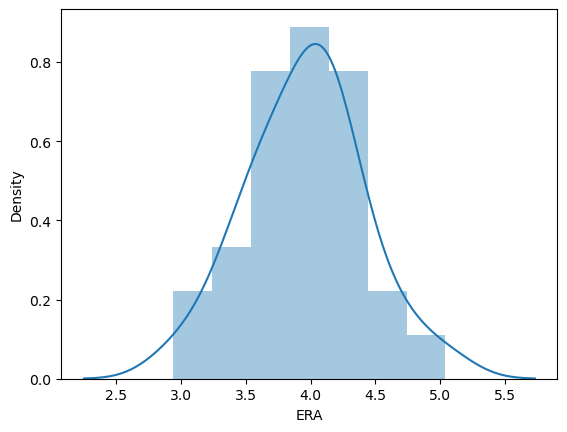

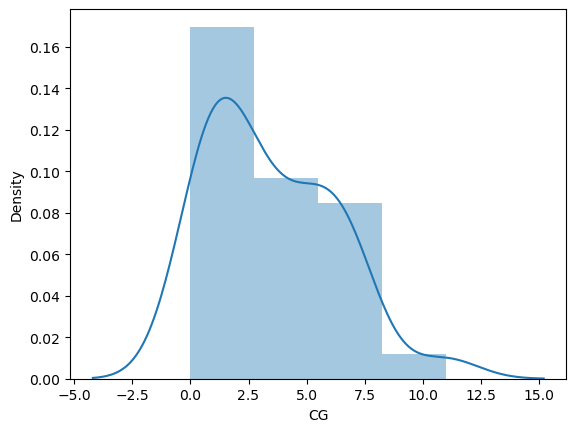

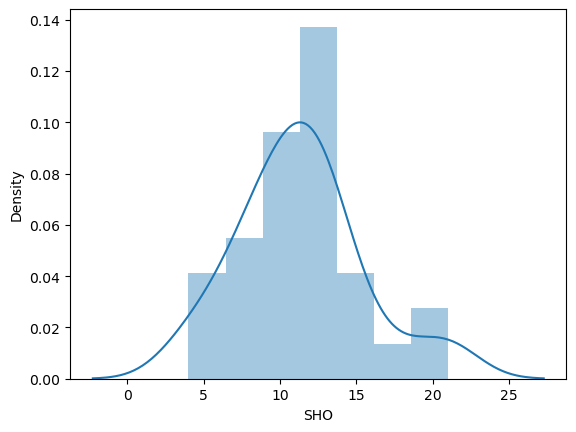

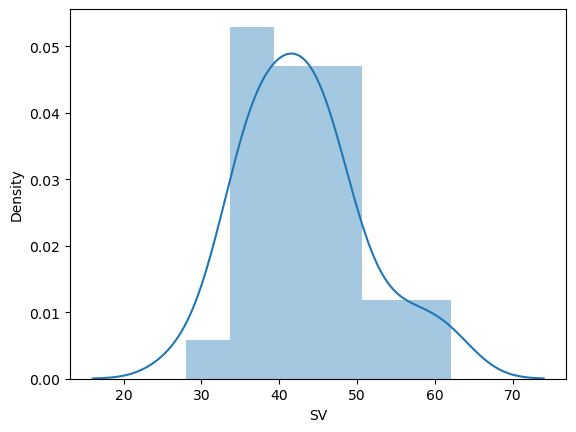

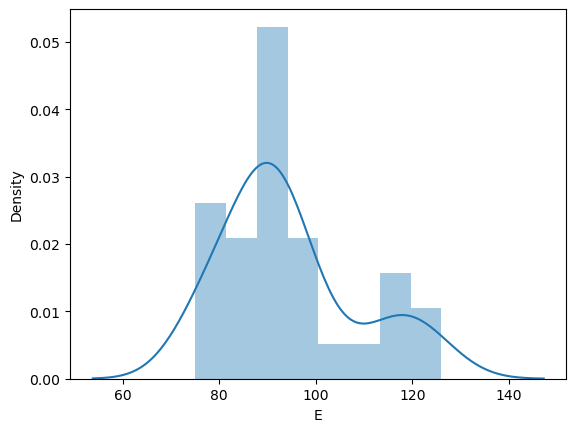

In [9]:
for i in df.columns:
    sns.distplot(df[i],kde=True)
    plt.show()

You can see the above plots there is no much skewess

***check for outliers***

W          Axes(0.125,0.77;0.227941x0.11)
R       Axes(0.398529,0.77;0.227941x0.11)
AB      Axes(0.672059,0.77;0.227941x0.11)
H         Axes(0.125,0.638;0.227941x0.11)
2B     Axes(0.398529,0.638;0.227941x0.11)
3B     Axes(0.672059,0.638;0.227941x0.11)
HR        Axes(0.125,0.506;0.227941x0.11)
BB     Axes(0.398529,0.506;0.227941x0.11)
SO     Axes(0.672059,0.506;0.227941x0.11)
SB        Axes(0.125,0.374;0.227941x0.11)
RA     Axes(0.398529,0.374;0.227941x0.11)
ER     Axes(0.672059,0.374;0.227941x0.11)
ERA       Axes(0.125,0.242;0.227941x0.11)
CG     Axes(0.398529,0.242;0.227941x0.11)
SHO    Axes(0.672059,0.242;0.227941x0.11)
SV         Axes(0.125,0.11;0.227941x0.11)
E       Axes(0.398529,0.11;0.227941x0.11)
dtype: object

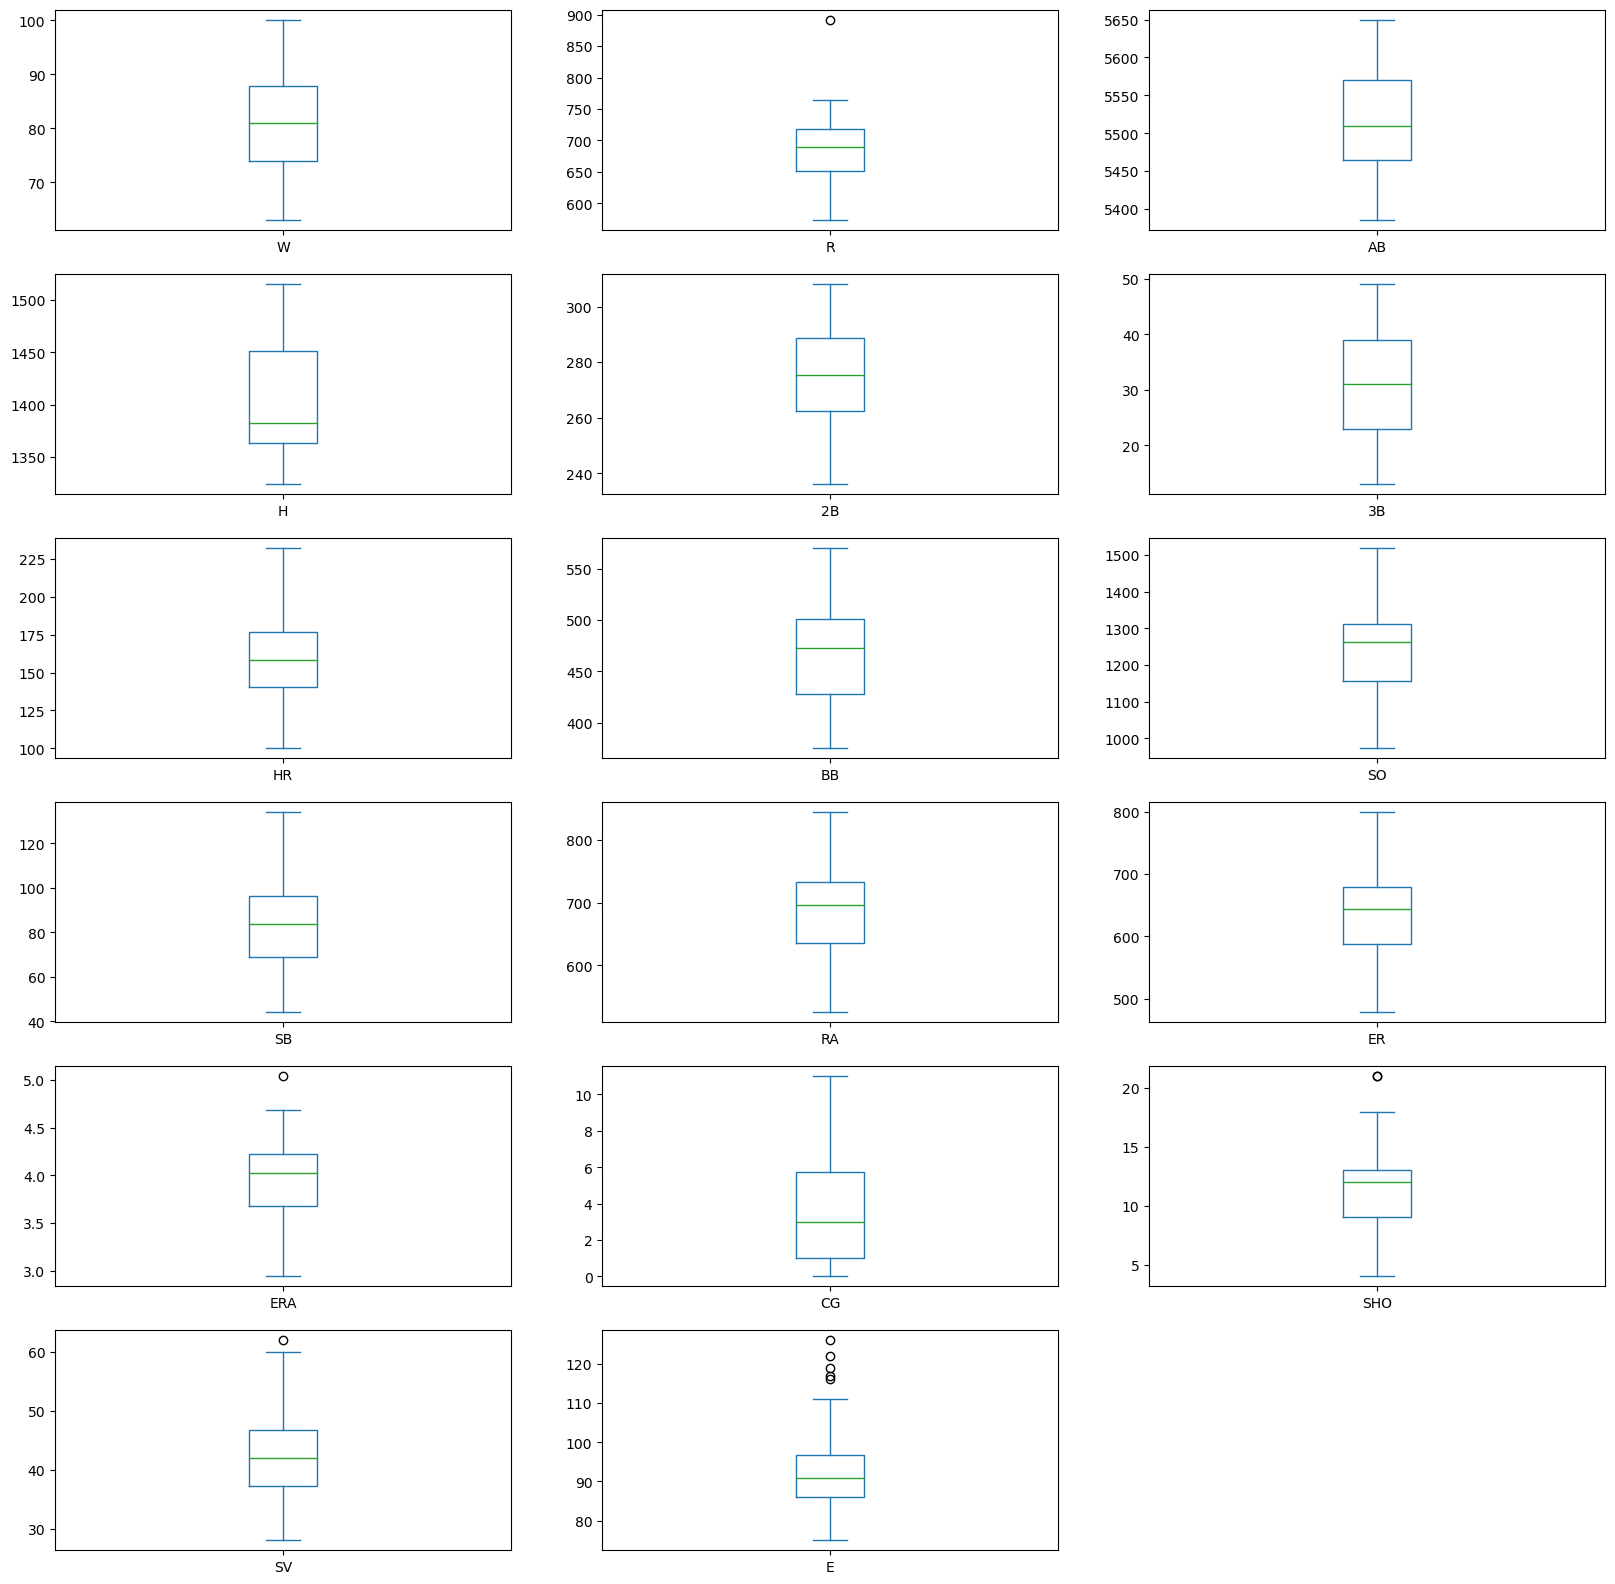

In [10]:
df.plot(kind='box',subplots=True,layout=(6,3),figsize=(20,20))

In [11]:
for i in df.drop('W',axis=1).columns:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)

    Q1=df[i].quantile(0.25)

    Q2=df[i].quantile(0.75)

    lowl=Q1-1.5*IQR
    print(lowl)
    upperl=Q2+1.5*IQR
    print(upperl)
    
    new_df=df[i].copy()
    
    new_df=np.where(new_df > upperl , upperl ,
                           np.where(new_df <lowl, lowl ,new_df
                                   )
                           )
    df[i]=new_df

550.75
818.75
5305.0
5729.0
1230.25
1584.25
222.5
328.5
-1.0
63.0
85.125
232.125
318.75
610.75
926.5
1542.5
27.75
137.75
491.875
876.875
449.25
817.25
2.8762499999999993
5.026250000000001
-6.125
12.875
3.0
19.0
23.0
61.0
69.875
112.875


W          Axes(0.125,0.77;0.227941x0.11)
R       Axes(0.398529,0.77;0.227941x0.11)
AB      Axes(0.672059,0.77;0.227941x0.11)
H         Axes(0.125,0.638;0.227941x0.11)
2B     Axes(0.398529,0.638;0.227941x0.11)
3B     Axes(0.672059,0.638;0.227941x0.11)
HR        Axes(0.125,0.506;0.227941x0.11)
BB     Axes(0.398529,0.506;0.227941x0.11)
SO     Axes(0.672059,0.506;0.227941x0.11)
SB        Axes(0.125,0.374;0.227941x0.11)
RA     Axes(0.398529,0.374;0.227941x0.11)
ER     Axes(0.672059,0.374;0.227941x0.11)
ERA       Axes(0.125,0.242;0.227941x0.11)
CG     Axes(0.398529,0.242;0.227941x0.11)
SHO    Axes(0.672059,0.242;0.227941x0.11)
SV         Axes(0.125,0.11;0.227941x0.11)
E       Axes(0.398529,0.11;0.227941x0.11)
dtype: object

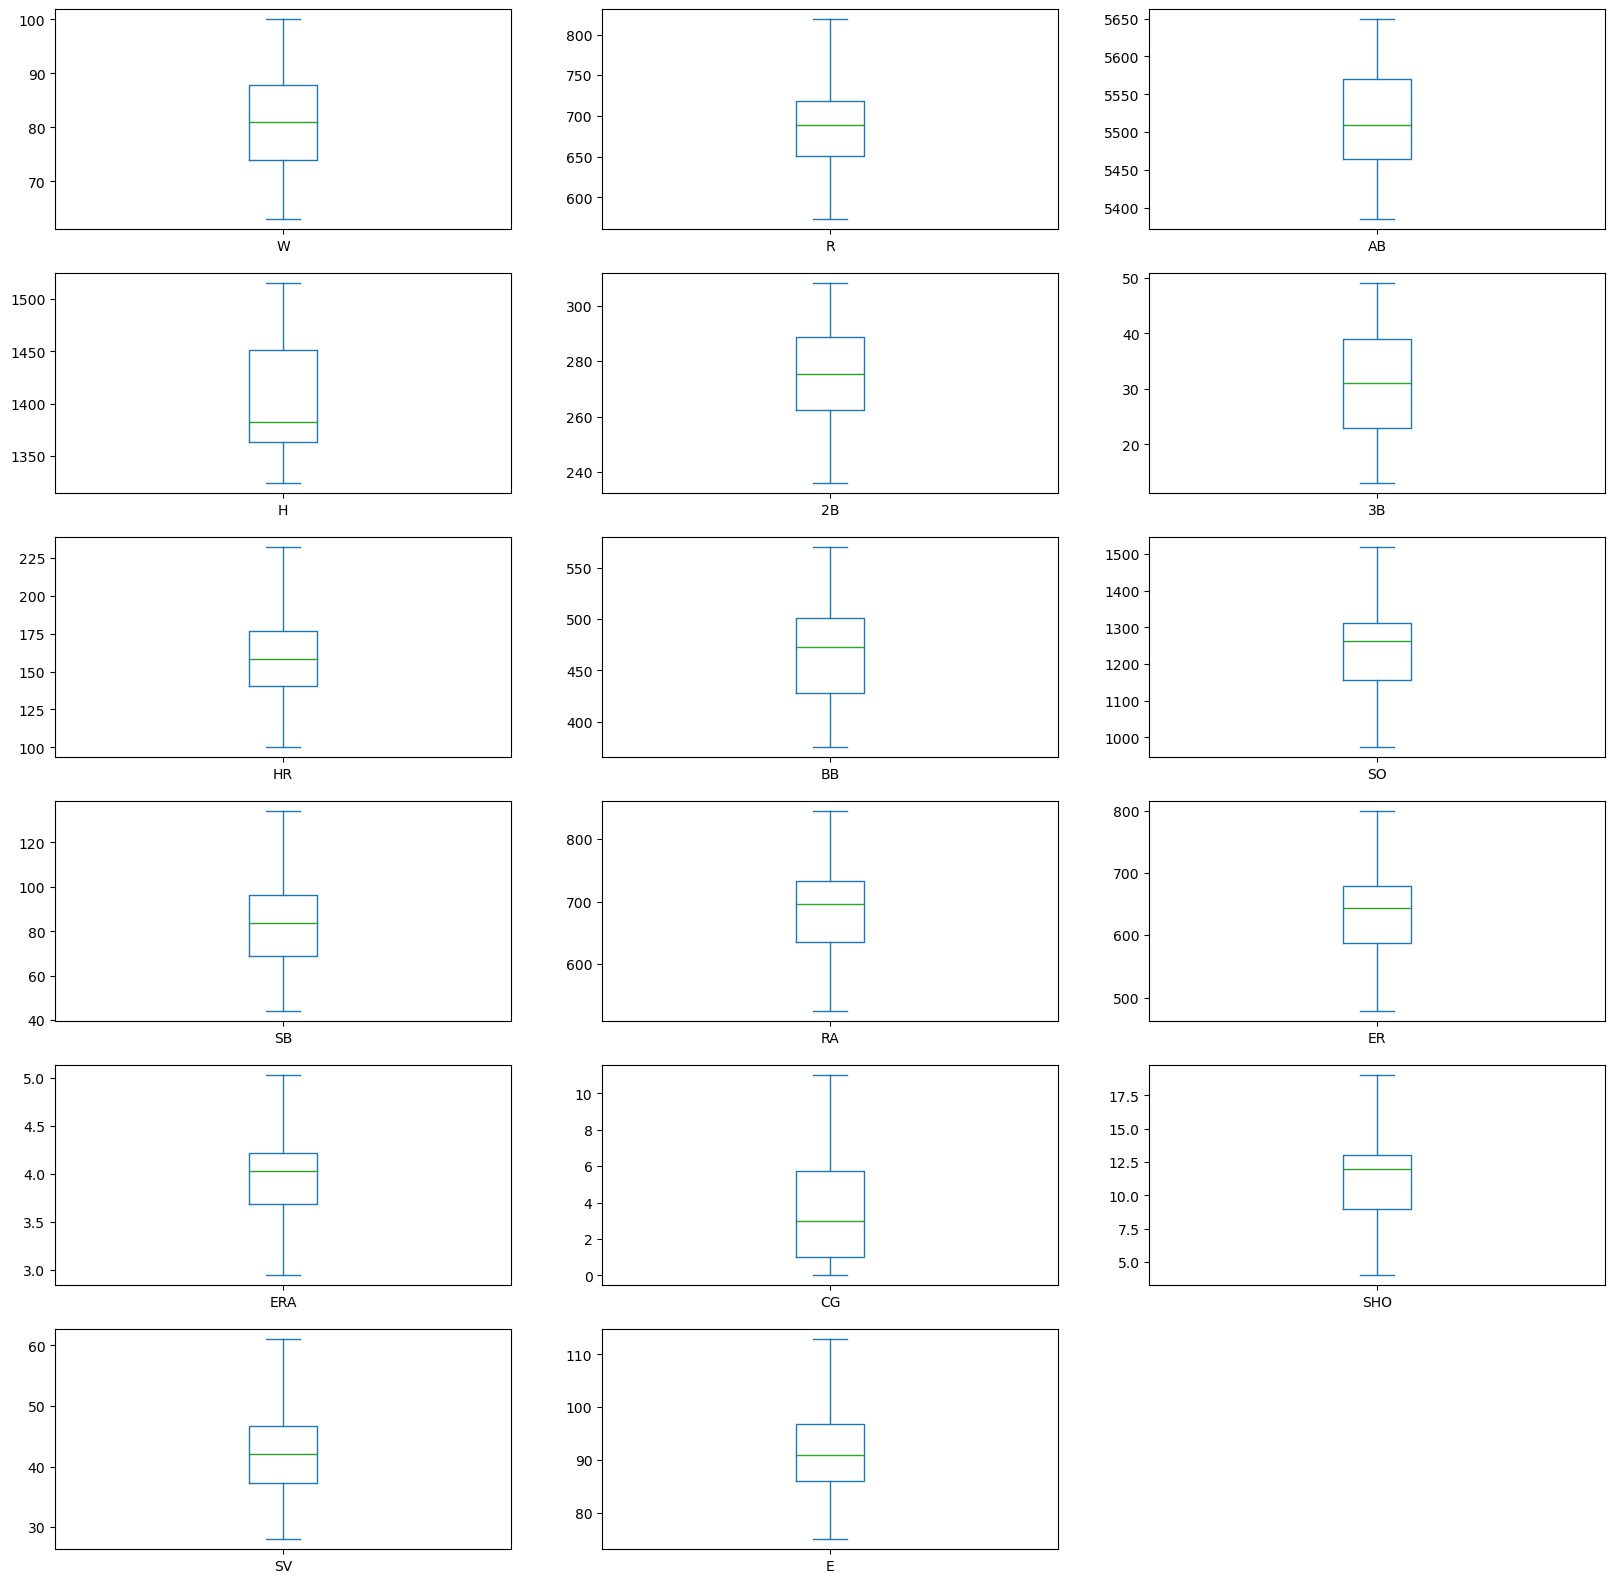

In [12]:
df.plot(kind='box',subplots=True,layout=(6,3),figsize=(20,20))

So the outliers which are present in some of the features are also removed

***Check for Correlation between feautures***

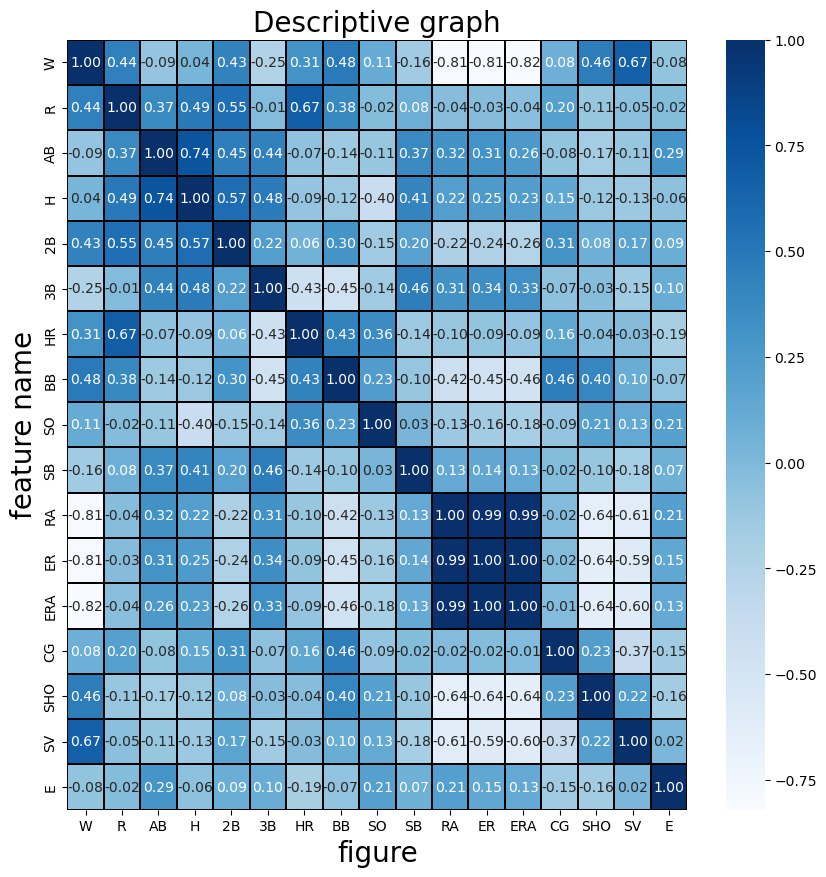

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Blues')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature name',fontsize=20)
plt.title('Descriptive graph',fontsize=20)
plt.show()

We can see RA,ER,ERA are highly correlated with each other so some features must be dropped to prevent overfitting

In [14]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [15]:
x=df.drop(['W'],axis=1)

In [16]:
corr_features=correlation(x,0.8)

In [17]:
print(corr_features)

{'ER', 'ERA'}


In [18]:
df_new=df.drop(['ERA','ER'],axis=1)

In [19]:
df_new.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,95,724.0,5575.0,1497.0,300.0,42.0,139.0,383.0,973.0,104.0,641.0,2.0,8.0,56.0,88.0
1,83,696.0,5467.0,1349.0,277.0,44.0,156.0,439.0,1264.0,70.0,700.0,2.0,12.0,45.0,86.0
2,81,669.0,5439.0,1395.0,303.0,29.0,141.0,533.0,1157.0,86.0,640.0,11.0,10.0,38.0,79.0
3,76,622.0,5533.0,1381.0,260.0,27.0,136.0,404.0,1231.0,68.0,701.0,7.0,9.0,37.0,101.0
4,74,689.0,5605.0,1515.0,289.0,49.0,151.0,455.0,1259.0,83.0,803.0,7.0,12.0,35.0,86.0


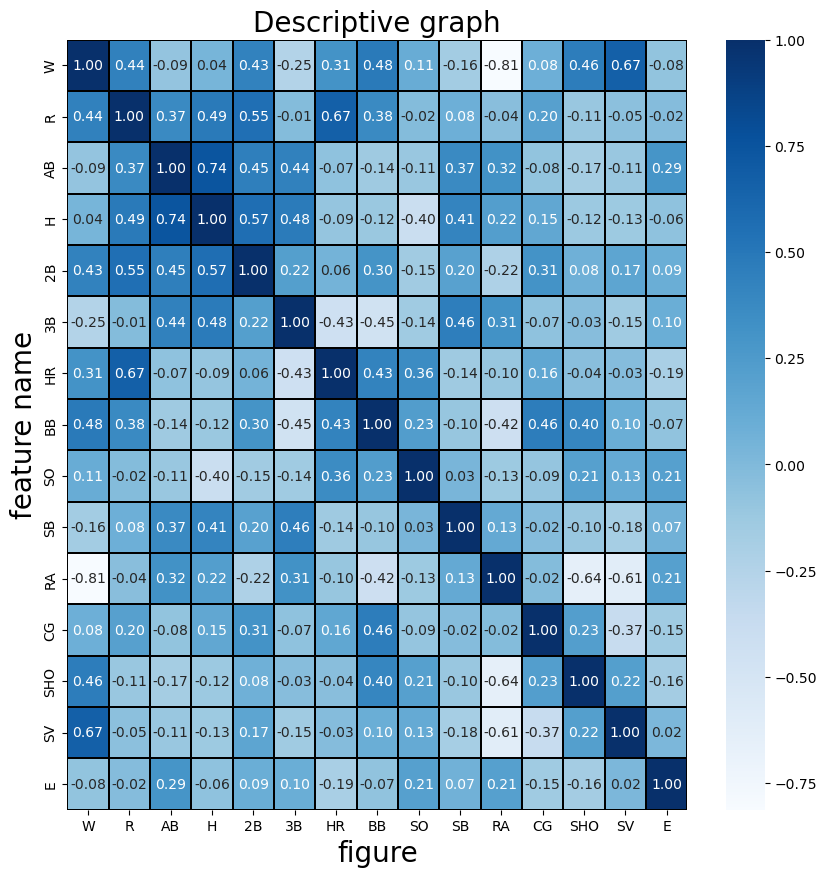

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Blues')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature name',fontsize=20)
plt.title('Descriptive graph',fontsize=20)
plt.show()

So correlation between features are rectified

***check of correlation with the features with the target***

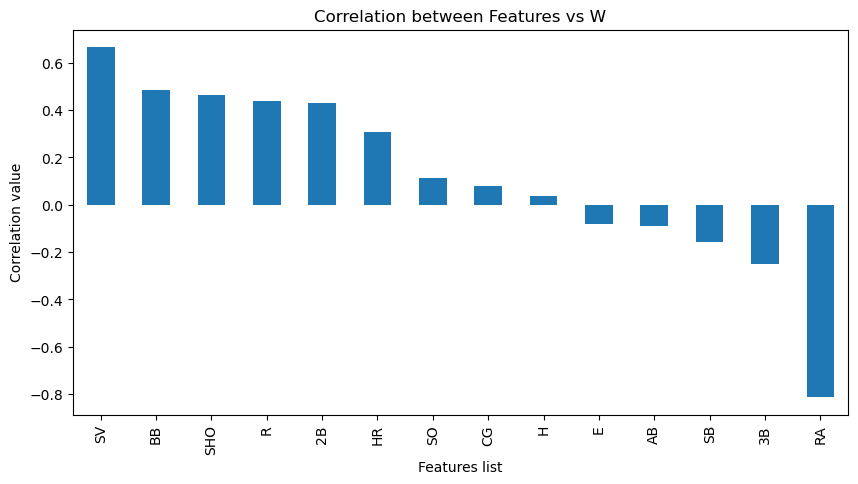

In [21]:
df_corr=df_new.corr()
plt.figure(figsize=(10,5))
df_corr['W'].sort_values(ascending=False).drop('W').plot.bar()
plt.title("Correlation between Features vs W")
plt.xlabel('Features list')
plt.ylabel('Correlation value')
plt.show()

In [22]:
df_new.drop(['SO','CG','H','AB'],axis=1,inplace=True)

***Splitting of data into features and target***

In [23]:
x=df_new.drop('W',axis=1)
y=df_new['W']

***Scaling or standardization of parameters***

In [24]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[ 0.75905161,  1.42017307,  1.04119304, -0.7872986 , -1.53490242,
         0.91388329, -0.66623393, -0.84415269,  1.69340239, -0.44746715],
       [ 0.20231435,  0.12740339,  1.23580856, -0.24396668, -0.5365919 ,
        -0.60182558,  0.16597077,  0.22214544,  0.25683995, -0.6213815 ],
       [-0.33453945,  1.58879521, -0.22380785, -0.7233772 ,  1.13914361,
         0.11144918, -0.68033909, -0.31100362, -0.65733615, -1.23008175],
       [-1.26906272, -0.82812203, -0.41842337, -0.8831807 , -1.16053598,
        -0.69098493,  0.18007593, -0.57757816, -0.78793273,  0.68297617],
       [ 0.06313003,  0.80189192,  1.72234737, -0.40377019, -0.25136033,
        -0.02228984,  1.61880269,  0.22214544, -1.0491259 , -0.6213815 ],
       [ 2.64301076,  1.86983209, -1.39150098,  2.18504658,  1.79874163,
         0.20060853, -0.25718416, -0.31100362, -1.17972249, -0.44746715],
       [ 1.55439057, -0.1536335 , -1.19688546,  1.54583256,  1.51351006,
        -0.91388329,  0.13776044, -1.91045082

***Find the best random score***

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [26]:
lr=LinearRegression()
maxAcc=0
rs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=r2_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
        
print("Best score ",maxAcc)
print("random state ",rs)

Best score  0.9301126054279654
random state  83


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [28]:
def Regression(lr,x,y):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=83)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    print("R2 score for test data:",r2_score(y_test,pred_test))
    print("R2 score train data :",r2_score(y_train,pred_train)*100)
    print("Mean absolute error:",mean_absolute_error(y_test,pred_test))
    print("Mean squared error:",mean_squared_error(y_test,pred_test))
    print("Root Mean squared error:",np.sqrt(mean_absolute_error(y_test,pred_test)))

In [29]:
lr=LinearRegression()
Regression(lr,x,y)

R2 score for test data: 0.9301126054279654
R2 score train data : 88.84601170546077
Mean absolute error: 1.9428548500778189
Mean squared error: 6.16562125446617
Root Mean squared error: 1.3938632824196995


In [30]:
lr=RandomForestRegressor()
Regression(lr,x,y)

R2 score for test data: 0.1557061712846345
R2 score train data : 94.52625640920465
Mean absolute error: 6.454444444444444
Mean squared error: 74.4854777777778
Root Mean squared error: 2.540559868305497


In [31]:
lr=DecisionTreeRegressor()
Regression(lr,x,y)

R2 score for test data: -0.7657430730478589
R2 score train data : 100.0
Mean absolute error: 10.222222222222221
Mean squared error: 155.77777777777777
Root Mean squared error: 3.197221015541813


In [32]:
lr=KNN()
Regression(lr,x,y)

R2 score for test data: 0.6747103274559193
R2 score train data : 74.9867508921613
Mean absolute error: 4.866666666666668
Mean squared error: 28.697777777777787
Root Mean squared error: 2.2060522810365732


In [33]:
lr=Ridge()
Regression(lr,x,y)

R2 score for test data: 0.9064982515623887
R2 score train data : 88.6156728715686
Mean absolute error: 2.3992739557450387
Mean squared error: 8.248932028829264
Root Mean squared error: 1.5489589909823431


In [34]:
lr=Lasso()
Regression(lr,x,y)

R2 score for test data: 0.877968902613558
R2 score train data : 85.84091193415881
Mean absolute error: 2.7422606949446506
Mean squared error: 10.76585459164833
Root Mean squared error: 1.6559772628102871


Out of these the linear regression is giving good results

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=83)

model = LinearRegression()
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Set Score:", test_score)

Best Parameters: {'fit_intercept': True, 'positive': True}
Best Score: nan
Test Set Score: 0.8051936222159688


In [37]:
best_model = LinearRegression(fit_intercept=True,positive=True)

best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

Test MSE: 17.18625155116898


In [38]:
import joblib

joblib.dump(best_model, 'Baseball.joblib')

['Baseball.joblib']

In [39]:
loaded_model = joblib.load('Baseball.joblib')

So for the above Baseball project the we did the regression analysis and we found that the LinearRegression model gives the best results with a better fit model. 